In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

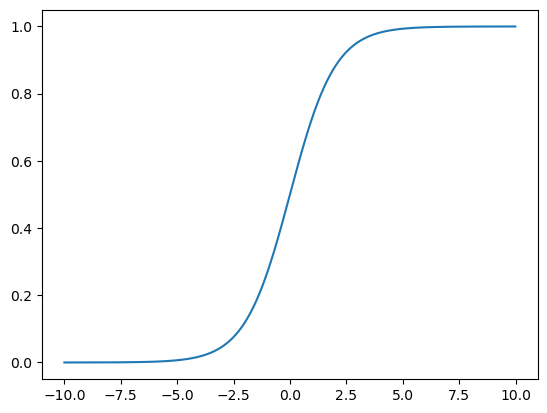

In [15]:
X = np.arange(-10,10,0.01)
plt.plot(X, sigmoid(X))
plt.show()

In [12]:
sigmoid(0)

0.5

Erreur avec sigmoid

In [16]:
def erreur(X, y, params):
    info = {}
    #params = {"w":w, "b":b}
    # X est le featurs (une matrice de taille (m,n))
    # y la sortie
    M1 = np.dot(X,params["w1"]) # dans ce cas w doit être de taille (n,1)
    N1 = M1 + params['b1']
    S = sigmoid(N1)
    M2 = np.dot(S, params['w2'])
    P = M2 + params['b2']
    
    L =  np.mean((y-P)**2)
    
    info['X'] = X
    info['y'] = y
    info['M1'] = M1
    info['N1'] = N1
    info['S'] = S
    info['M2'] = M2
    info['P'] = P
    
    return L, info


In [45]:
def gradian(info, param):
    grad = {}
    dl_dp = -2 * (info['y'] - info['P'])
    dp_b2 = 1
    dm2_w2 = info["S"].T
    dm2_s1 = param['w2'].T
    ds_dn1 = sigmoid(info['N1']) * (1 - sigmoid(info["N1"]))
    dl_ds = np.dot(dl_dp, dm2_s1)
    
    dl_n1 = dl_ds * ds_dn1
    dn1_b1 = 1
    dm1_dw1 = info['X'].T
    # pour le transformation
    #***********************
    #pour la prediction
    # ********************************
    dl_w2 = np.dot(dm2_w2,dl_dp)*dp_b2
    #********************************
    dl_db1 = (dl_n1 * dn1_b1).sum()
    dl_db1 = np.sum(dl_db1)
    dl_dm1 = dl_n1
    #********************************
    dl_db2 =np.sum(dl_dp * dp_b2)
    
    #dl_dw = np.dot(dm_dw, dl_dp ) * dp_dm    
    #dl_db = np.sum(dl_dp*1)
    dl_w1 = np.dot(dm1_dw1,dl_dm1)
    # pour le transformation
    grad['w1'] = dl_w1
    grad['b1'] = dl_db1
    #pour le prédiction
    grad['w2'] = dl_w2
    grad['b2'] = dl_db2
    
    return grad

In [46]:
def train(X,y, epoch, learning_rate):
    # weight initialisation
    params = {}
    
    n_features = X.shape[1]
    np.random.seed(42)
    params["w1"] = np.random.randn(n_features,n_features)
    params["b1"] = np.random.randn(1,n_features)
    params["w2"] = np.random.randn(n_features,1)
    params["b2"] = np.random.randn(1,1)
    
    liste_erreur = []
    # forward
    for i in range(epoch):
        loss, info = erreur(X,y,params)
        liste_erreur.append(loss)
        print(f'Epoch {i+1}............................ loss => {loss}')
        
        # backword 
        # le gradiant descent
        grad = gradian(info, params)
        
        #update
        for p in params:
            params[p] = params[p] - learning_rate * grad[p]
    return params, liste_erreur

In [47]:
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

In [48]:
X = data
y = target.reshape(506,1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [50]:
params, erreurs = train(X_train, y_train, epoch=60, learning_rate=0.0001)

Epoch 1............................ loss => 658.747187918459
Epoch 2............................ loss => 364.03824881583705
Epoch 3............................ loss => 204.36163978775102
Epoch 4............................ loss => 107.81590012640753
Epoch 5............................ loss => 79.82851947423356
Epoch 6............................ loss => 69.19238067900142
Epoch 7............................ loss => 61.51000932784534
Epoch 8............................ loss => 55.87126460945957
Epoch 9............................ loss => 51.61089918880339
Epoch 10............................ loss => 48.18702007396802
Epoch 11............................ loss => 45.279434222606184
Epoch 12............................ loss => 42.70984702947751
Epoch 13............................ loss => 40.38472696704206
Epoch 14............................ loss => 38.25904125179606
Epoch 15............................ loss => 36.312561000344154
Epoch 16............................ loss => 34.535764441910

Text(0, 0.5, "l'erreur")

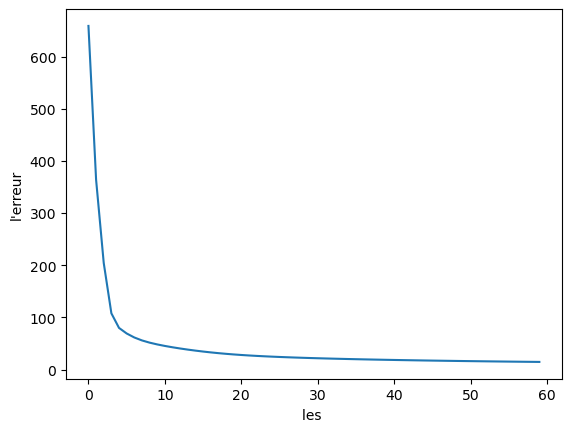

In [52]:
import matplotlib.pyplot as plt
plt.plot(erreurs)
plt.xlabel('les ')
plt.ylabel("l'erreur")


In [54]:
def predict(X, params):
    M = np.dot(X, params["w1"])
    
    N = M + params['b1']
    S = sigmoid(N)
    M2 = np.dot(S,params["w2"])
    P = M2+params["b2"]
    return P

In [55]:
def mse(y, pred):
    return np.mean((y-pred)**2)

def rmse(y, pred):
    return np.sqrt(np.mean((y-pred)**2))

def mae(y, pred):
    return np.mean(np.abs(y-pred))

In [56]:
prediction = predict(X_test, params)
score_rmse = rmse(y_test, prediction)
score_mae = mae(y_test, prediction)

In [57]:
print('RMse: {}'.format(score_rmse))
print('Mae: {}'.format(score_mae))

RMse: 5.1334546911798205
Mae: 3.351871573131282
